In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# read data
data_TS_1 = pd.read_csv('./dataset/Taylor_Swift_albumsales.csv')
# data_TS_2 = pd.read_csv('./dataset/Taylor_Train.csv')

In [13]:
data_TS_1

,Album,Year,Continent,Country,Sales,Pure_sales_index
0,Taylor Swift,2006,Asia,Afghanistan,42.0,0.042
1,Taylor Swift,2007,Asia,Afghanistan,27.0,0.027
2,Taylor Swift,2008,Asia,Afghanistan,27.0,0.027
3,Taylor Swift,2009,Asia,Afghanistan,29.0,0.029
4,Taylor Swift,2010,Asia,Afghanistan,34.0,0.034
...,...,...,...,...,...,...
8275,Evermore,2021,South America,Peru,200.0,0.200
8276,Evermore,2020,South America,Uruguay,53.0,0.053
8277,Evermore,2021,South America,Uruguay,49.0,0.049
8278,Evermore,2020,South America,Venezuela,700.0,0.700


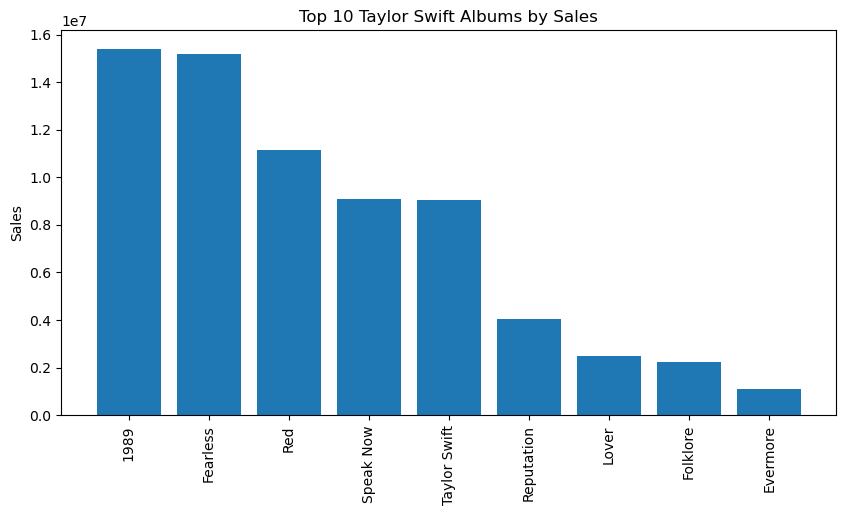

In [16]:
# array with total sales of each album summed up
sales_per_album = {}

for ele in data_TS_1.iterrows():
    ele = ele[1] # get the data from the tuple
    album = ele['Album']
    sales = ele['Sales']
    if album in sales_per_album:
        sales_per_album[album] += sales
    else:
        sales_per_album[album] = sales

top_10_albums = sorted(sales_per_album.items(), key=lambda x: x[1], reverse=True)[:10]

# plot top 10 albums
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in top_10_albums], [x[1] for x in top_10_albums])
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Top 10 Taylor Swift Albums by Sales')
plt.show()


In [21]:
# print country wise sales
country_sales = {}

for ele in data_TS_1.iterrows():
    ele = ele[1] # get the data from the tuple
    country = ele['Country']
    sales = ele['Sales']
    if country in country_sales:
        country_sales[country] += sales
    else:
        country_sales[country] = sales

import plotly.graph_objects as go
import plotly.express as px

country_and_sales = pd.DataFrame(country_sales.items(), columns=['Country', 'Sales'])

# Create the world map plot using Plotly
fig1_pop = px.choropleth(country_and_sales, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Sales", 
                    range_color=[0, 1e7],
                    title="Sales of Taylor Swift Albums in the World"
                   )
fig1_pop.update_layout(
    # height=400,
    title_font=dict(size=25),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()

In [20]:
country_and_sales

,Country,Sales
0,Afghanistan,29323.0
1,Azerbaijan,22266.0
2,Bahrain,2470.0
3,Bangladesh,413500.0
4,Brunei,2856.0
...,...,...
111,Paraguay,87488.0
112,Peru,162565.0
113,Uruguay,148670.0
114,Venezuela,122614.0
